In [1]:
pip install sktime

     |████████████████████████████████| 6.6 MB 4.9 MB/s 
     |████████████████████████████████| 3.3 MB 40.7 MB/s 
     |████████████████████████████████| 9.8 MB 34.9 MB/s 
     |████████████████████████████████| 34.5 MB 8.3 kB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2


In [132]:
from sktime.utils.plotting import plot_series
import pandas as pd
from sktime.forecasting.model_selection import temporal_train_test_split
#from sktime.performance_metrics.forecasting import smape_loss
import matplotlib.pyplot as plt

%matplotlib inline

In [133]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [134]:
df = pd.read_csv("BTC-USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-16,394.518005,398.807007,373.070007,382.556000,382.556000,26990000
1,2014-10-17,382.756012,385.477997,375.389008,383.757996,383.757996,13600700
2,2014-10-18,383.976013,395.157990,378.971008,391.441986,391.441986,11416800
3,2014-10-19,391.253998,393.938995,386.457001,389.545990,389.545990,5914570
4,2014-10-20,389.230988,390.084015,378.252014,382.845001,382.845001,16419000


In [121]:
# Important step to make the model work - Set the Date column as Index
df["Date"] = pd.to_datetime(df["Date"])
df.set_index('Date', inplace=True)
df.index = pd.PeriodIndex(df.index, freq="D")
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-16,394.518005,398.807007,373.070007,382.556000,382.556000,26990000
2014-10-17,382.756012,385.477997,375.389008,383.757996,383.757996,13600700
2014-10-18,383.976013,395.157990,378.971008,391.441986,391.441986,11416800
2014-10-19,391.253998,393.938995,386.457001,389.545990,389.545990,5914570
2014-10-20,389.230988,390.084015,378.252014,382.845001,382.845001,16419000


In [75]:
# Holtwinters - won't use it
# SES example
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import numpy as np

from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = SimpleExpSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[99.40360338]


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 2709 entries, 2014-10-16 to 2022-03-16
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2709 non-null   float64
 1   High       2709 non-null   float64
 2   Low        2709 non-null   float64
 3   Close      2709 non-null   float64
 4   Adj Close  2709 non-null   float64
 5   Volume     2709 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 148.1 KB


In [77]:
data = np.asarray(df)
#model = SimpleExpSmoothing(data)

In [78]:
data

array([[3.94518005e+02, 3.98807007e+02, 3.73070007e+02, 3.82556000e+02,
        3.82556000e+02, 2.69900000e+07],
       [3.82756012e+02, 3.85477997e+02, 3.75389008e+02, 3.83757996e+02,
        3.83757996e+02, 1.36007000e+07],
       [3.83976013e+02, 3.95157990e+02, 3.78971008e+02, 3.91441986e+02,
        3.91441986e+02, 1.14168000e+07],
       ...,
       [3.78463164e+04, 3.97425000e+04, 3.76807344e+04, 3.96667539e+04,
        3.96667539e+04, 2.43221591e+10],
       [3.96642500e+04, 3.97946289e+04, 3.83102109e+04, 3.93387852e+04,
        3.93387852e+04, 2.39340009e+10],
       [3.93046211e+04, 4.14654531e+04, 3.90414688e+04, 4.07699375e+04,
        4.07699375e+04, 3.71744891e+10]])

In [79]:
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(df), len(df))
# yhat = model_fit.predict(len(data), len(data))
print(yhat)

[99.40360338]


In [69]:
#from sktime.performance_metrics.forecasting import mean_absolute_percentage_error


In [ ]:
#mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

**Variance of the First Approach**

In [56]:
import pandas as pd

In [57]:
# imports necessary for this chapter
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.utils.plotting import plot_series

# data loading for illustration (see section 1 for explanation)
y = pd.read_csv('BTC-USD.csv')
y_train, y_test = temporal_train_test_split(y, test_size=36)
fh = ForecastingHorizon(y_test.index, is_relative=False)

In [58]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [ ]:
forecaster = ExponentialSmoothing(trend="add", seasonal="additive", sp=12)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

**Another approach - Nice approach, study it in depth and check results, consider deleting the data from 2014 to 2018. Most likely using this one in the project. Evaluation will be placed in the end of this file!**

In [135]:
df.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [136]:
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,Date,Close
0,2014-10-16,382.556000
1,2014-10-17,383.757996
2,2014-10-18,391.441986
3,2014-10-19,389.545990
4,2014-10-20,382.845001


In [137]:
# get data from dataset from July 2020
start_date = '2020-07-16'
end_date = '2022-02-02'
mask = (df['Date'] > start_date) & (df['Date'] <= end_date)
df = df.loc[mask] 

In [138]:
# Important step to make the model work - Set the Date column as Index
#df["Date"] = pd.to_datetime(df["Date"])
df.set_index('Date', inplace=True)
df.index = pd.PeriodIndex(df.index, freq="D")
df.head()

,Close
Date,
2020-07-17,9151.392578
2020-07-18,9159.040039
2020-07-19,9185.817383
2020-07-20,9164.231445
2020-07-21,9374.887695


In [139]:
train, test = temporal_train_test_split(df, test_size = 36)

In [140]:
fh = list(range(1,37))

In [141]:
simple_exp = ExponentialSmoothing(trend=None, seasonal=None)

In [142]:
#train.drop(['Date'])
train.head()

,Close
Date,
2020-07-17,9151.392578
2020-07-18,9159.040039
2020-07-19,9185.817383
2020-07-20,9164.231445
2020-07-21,9374.887695


In [143]:
simple_exp.fit(train)

ExponentialSmoothing()

In [144]:
pred = simple_exp.predict(fh)

In [145]:
pred

,Close
2021-12-29,47709.740425
2021-12-30,47709.740425
2021-12-31,47709.740425
2022-01-01,47709.740425
2022-01-02,47709.740425
2022-01-03,47709.740425
2022-01-04,47709.740425
2022-01-05,47709.740425
2022-01-06,47709.740425
2022-01-07,47709.740425


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9f429c7190>)

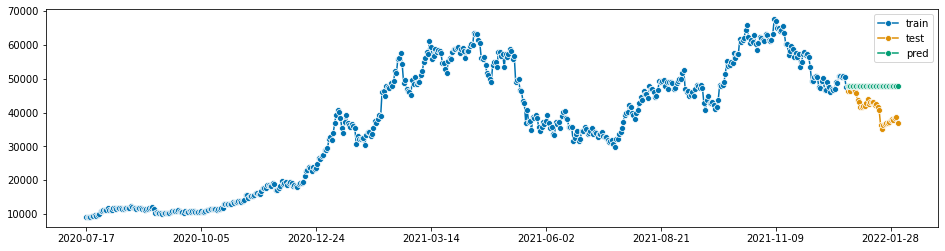

In [146]:
plot_series(train, test, pred, labels = ["train", "test", "pred"])

Another approach - Think about this one a bit more


In [21]:
# 1
import statsmodels.api as sm
import pandas as pd
import matplotlib as plt
import numpy as np
from datetime import datetime


In [32]:
# 2
df = pd.read_csv("BTC-USD.csv")

In [30]:
# df.drop(['Date'], axis=1, inplace=True)

In [33]:
# 3
df["Date"] = pd.to_datetime(df["Date"])

In [34]:
df1 = np.asarray(df)

In [35]:
# 4
df = df.reset_index().resample('D', on="Date")['Open'].mean()

In [36]:
# 5
mod = sm.tsa.ExponentialSmoothing(
 endog=df, trend='add'
 )
res = mod.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [37]:
# 6
forecasts = pd.Series(res.forecast(steps=31))

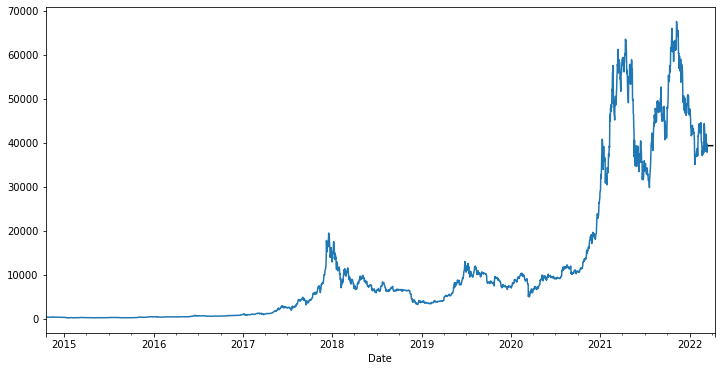

In [38]:
# 7
ax = df.plot(figsize=(12, 6))
#plt.ylabel('SPY')
forecasts.plot(style='k--')

A small and quick try with SilverKite - Do not use this one in the project

In [39]:
pip install greykite

     |████████████████████████████████| 21.9 MB 1.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 297 kB 41.1 MB/s 
     |████████████████████████████████| 11.2 MB 51.1 MB/s 
     |████████████████████████████████| 1.4 MB 49.8 MB/s 
     |████████████████████████████████| 211 kB 69.5 MB/s 
     |████████████████████████████████| 9.9 MB 40.9 MB/s 
     |████████████████████████████████| 2.8 MB 49.4 MB/s 
     |████████████████████████████████| 95 kB 4.5 MB/s 
     |████████████████████████████████| 899 kB 52.7 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: pluggy
    Found existing installation: pluggy 0.7.1
    Uninstalling pluggy-0.7.1:
      Success

In [40]:
from greykite.framework.templates.autogen.forecast_config import (
 ForecastConfig, MetadataParam
)
metadata = MetadataParam(
 time_col="date",
 value_col="new_cases",
 freq="W"
)

In [41]:
pip install Forecaster

     |████████████████████████████████| 462 kB 5.0 MB/s 
  Created wheel for Forecaster: filename=forecaster-0.2-py3-none-any.whl size=14052 sha256=46f40fbc3229001c65c5eb4712b9f27e32f3ef213c0603721080686cb1c80d1c
  Stored in directory: /root/.cache/pip/wheels/40/d3/25/99c63ca72006fca65568ea197cbe269a28893cee13b1fd83b8
Successfully built Forecaster


In [42]:
df.reset_index()

,Date,Open
0,2014-10-16,394.518005
1,2014-10-17,382.756012
2,2014-10-18,383.976013
3,2014-10-19,391.253998
4,2014-10-20,389.230988
...,...,...
2704,2022-03-12,38794.464844
2705,2022-03-13,38884.726563
2706,2022-03-14,37846.316406
2707,2022-03-15,39664.250000


In [ ]:
# Check error from it
import warnings
from greykite.framework.templates.forecaster import Forecaster
from greykite.framework.templates.model_templates import ModelTemplateEnum

forecaster = Forecaster()
warnings.filterwarnings("ignore", category=UserWarning)
result = forecaster.run_forecast_config(
    df=df,
    config=ForecastConfig(
    model_template=ModelTemplateEnum.SILVERKITE_DAILY_90.name,
    forecast_horizon=90,
    coverage=0.95,
    metadata_param=metadata
  )
 ) 

In [ ]:
forecast = result.forecast
forecast.plot().show(renderer="colab")

In [ ]:
# Create function to read dataset and run prediction automatically


# Create function to evaluate the model and its accuracy

